# Life Expectancy and GDP

###### Firstly it's necessary to import all modules

In [66]:
#import modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp

###### Now that the necessary modules are imported we can load the data into a DataFrame and inspect it's structure

In [2]:
#load the DataFrame
lfe_data = pd.read_csv("all_data.csv")

#print the first five rows
print(lfe_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


###### The data has four columns:
            + Country
            + Year
            + Life expectancy at birth (years)
            + GDP
       From opening the file it is possible to know that it's composed by 96 rows.
       The first thing to do is to change the name of the column "Life expectancy at birth (years)" to "Life_expectancy" for easier access.

In [3]:
#rename the column
lfe_data.rename(columns = {"Life expectancy at birth (years)": "Life_expectancy"}, inplace = True)

#check the changes
print(lfe_data.head())

  Country  Year  Life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


## Explore and Draw Conclusions

#### Firstly let's know how many countries are in the dataset and throughout how many years where the data obtained

In [4]:
#number of countries
num_contr = lfe_data.Country.nunique()
print("There are {0} countries in the dataset.".format(str(num_contr)))

#years
num_years = lfe_data.Year.nunique()
first_year = lfe_data.Year.min()
last_year = lfe_data.Year.max()
print("The data where obtained throughout {0} years being the first {1} and the last {2}.".format(str(num_years), str(first_year), str(last_year)))

There are 6 countries in the dataset.
The data where obtained throughout 16 years being the first 2000 and the last 2015.


##### How has the life expectancy change in these six countries over the 16 years?

[2000, 2015, 43.3, 82.0]

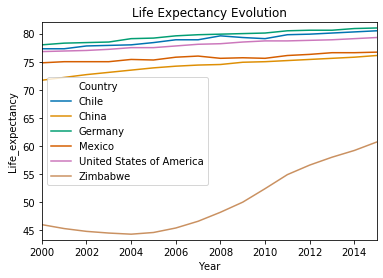

In [5]:
sns.set_palette("colorblind")
sns.lineplot(data = lfe_data, x = "Year", y = "Life_expectancy", hue = "Country")
plt.title("Life Expectancy Evolution")
plt.axis([2000, 2015, lfe_data.Life_expectancy.min() - 1, lfe_data.Life_expectancy.max() + 1])

#### What about the GDP?

[2000, 2015, -995584297200.0, 19100000000000.0]

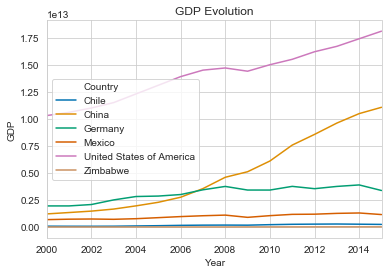

In [6]:
sns.set_style("whitegrid")
sns.lineplot(data = lfe_data, x = "Year", y = "GDP", hue = "Country")
plt.title("GDP Evolution")
plt.axis([2000, 2015, lfe_data.GDP.min() - 1e12, lfe_data.GDP.max() + 1e12])

#### Does the GDP has an effect on life expectancy?

Considering that the GDP represents the whealth of the country it would be interesting to see if the countries population life expectancy is some how correlated whith the GDP.
Let's start by comparing the evolution of the GDP and Life Expectancy of each country.

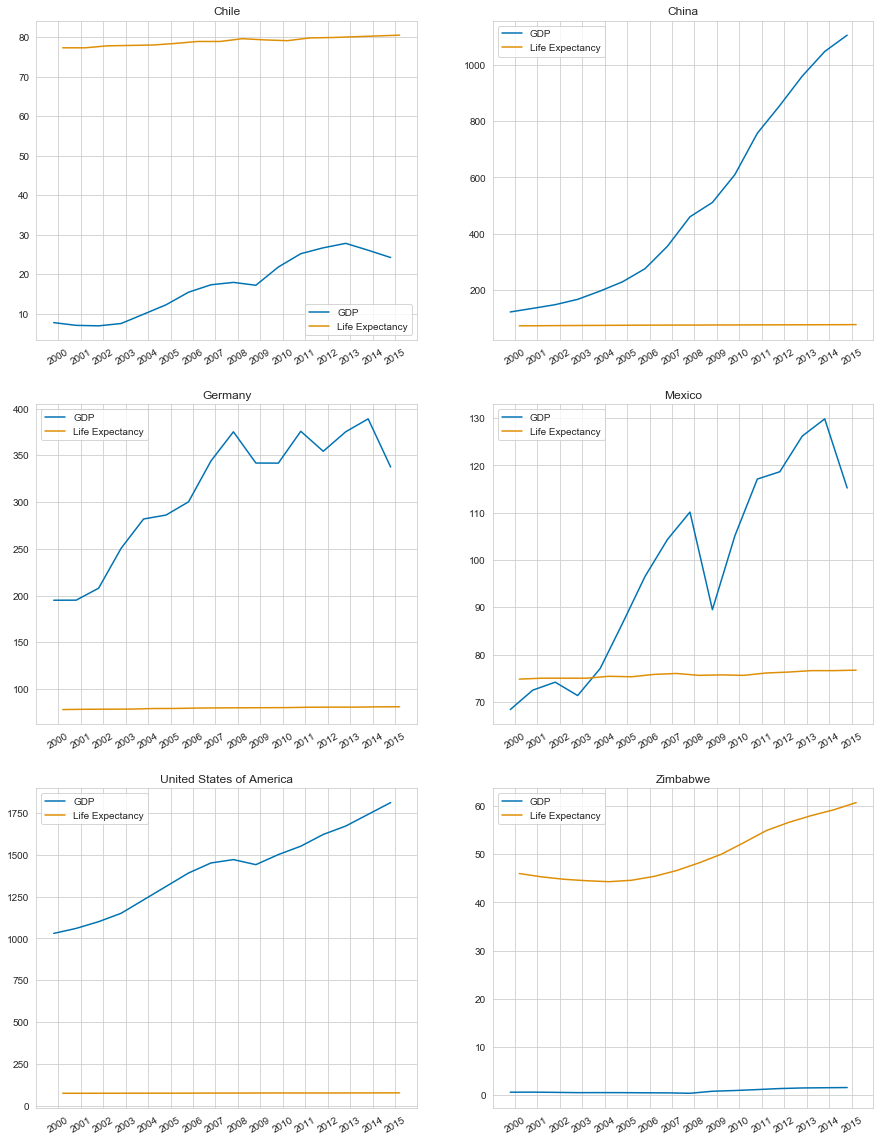

In [84]:
#countries list
country_list = lfe_data["Country"].unique()
#print(country_list)

plt.figure(figsize = (15, 20))

for i in range(len(country_list)):
    country = lfe_data[lfe_data["Country"] == country_list[i]]

    n = 1  # This is our first dataset (out of 2, GDP)
    t = 2 # Number of dataset
    d = len(country["Year"]) # Number of sets of bars
    w = 0.8 # Width of each bar
    x1 = [t*element + w*n for element in range(d)]

    n = 2  # This is our first dataset (out of 2, Life Expectancy)
    t = 2 # Number of dataset
    d = len(country["Year"]) # Number of sets of bars
    w = 0.8 # Width of each bar
    x2 = [t*element + w*n for element in range(d)]
    
    middle_x = [ (a + b) / 2.0 for a, b in zip(x1, x2)]
    
    plt.subplot(3, 2, i + 1)
    
    plt.plot(x1, country["GDP"] / 1e10, label = "GDP")
    plt.plot(x2, country["Life_expectancy"], label = "Life Expectancy")
    plt.legend()
    plt.title(country_list[i])
    plt.xticks(middle_x, country["Year"], rotation = 30)

##### As seen above the GDP as little to no effect on the country life expectancy

### Next it would be interesting to see how the life expectancy is spread out through the countries

First it's necessary to calculate the quantitative data:
    + Average
    + Median
    + Mode
    + Standard Deviation

###### Average

In [90]:
#life expectancy's average
average = lfe_data.Life_expectancy.mean()
print("The average life expectancy is {0} years.".format(str(average)))

The average life expectancy is 72.78958333333335 years.


##### Median

In [91]:
#life expectancy's median
median = lfe_data.Life_expectancy.median()
print("The median life expectancy is {0} years.".format(str(median)))

The median life expectancy is 76.75 years.


##### Mode

In [98]:
#life expectancy's mode
mode_array = np.array(lfe_data["Life_expectancy"])
mode = sp.stats.mode(mode_array)
print("The mode life expectancy is {0} years, appearing {1} times.".format(str(mode[0]), str(mode[1])))

The mode life expectancy is [75.] years, appearing [4] times.


##### Standard Deviation

In [97]:
#life expectancy's standard deviation
std_array = np.array(lfe_data["Life_expectancy"])
std = np.std(std_array)
print("The standard deviation of the life expectancy is {0}.".format(str(std)))

The standard deviation of the life expectancy is 10.617148855808177.


### Visualizing These Distributions

In order to better understand these calculations let's create some charts:
    + An histogram to see the distribution of the values
    + A box plot to see the spread of the values
    + A violin plot to put all together

##### Histogram

Text(0.5, 0, 'Life_expectancy')

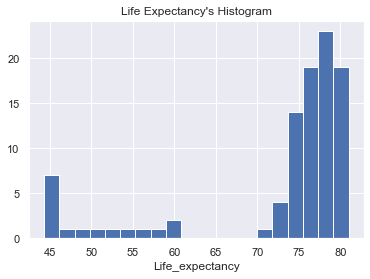

In [109]:
sns.set_style("white")
sns.set()
ax = plt.subplot()
plt.hist(lfe_data["Life_expectancy"], bins = 20)
plt.title("Life Expectancy's Histogram")
plt.xlabel("Life_expectancy")

###### From the histogram is possible to see that the data has a bimodal distribution, being left-skewed. It also confirms the median of the life expectancy.

##### Box Plot

Text(0.5, 1.0, "Life Expectancy's Box Plot")

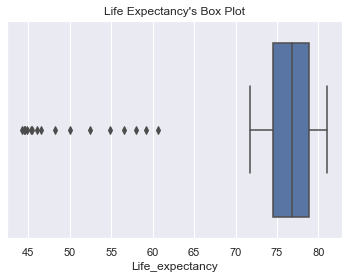

In [110]:
sns.boxplot(data = lfe_data, x = "Life_expectancy")
plt.title("Life Expectancy's Box Plot")

###### From the box plot is possible to see that the interquarile range is between 74 years old and 78 years old. The majority of the data is between 72 years old and 82 years old.

One more observation that is possible to obtain is that although we previously thought that the  distribution was bimodal, the fact is that the first clustering of the data are outliers.

#### Violin Plot

Text(0.5, 1.0, "Life Expectancy's Violin Plot")

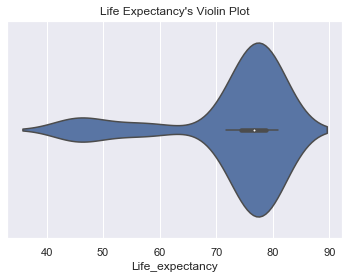

In [112]:
sns.violinplot(data = lfe_data, x = "Life_expectancy")
plt.title("Life Expectancy's Violin Plot")

###### In this plot is possible to confirm all of the assumptions made in the previous plots, being necessary to say that the previous plots allowed to visualize the distribution in a greater detail.